<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/82/Glovo_logo.svg/1200px-Glovo_logo.svg.png" width="200">
  
  <h1 style="color: #FFC244;">Projet : Analyse et Prédiction de la Satisfaction Client (Glovo Tunisie)</h1>
  
  <p style="font-size: 18px;">
    <strong style="color: #00A082;">Objectif :</strong>
    Nettoyer les données, analyser les retards et prédire la satisfaction des clients tunisiens.
  </p>
</div>

---

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">
  1. Business Understanding
</h2>

<p style="font-size: 16px;">
  L'objectif de cette étape est de définir le cadre du projet. Pour Glovo Tunisie, il s'agit d'analyser les données de livraison pour :
</p>

<ul style="list-style-type: disc; color: #333;">
  <li>Comprendre les causes des retards de livraison.</li>
  <li>Prédire si une commande arrivera à temps ou non.</li>
  <li>Optimiser la satisfaction client en fonction de la distance et du montant des commandes.</li>
</ul>

---

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">
  2. Data Understanding
</h2>
<p style="font-size: 16px;">
  Cette phase consiste à charger le dataset et à effectuer une exploration initiale pour vérifier la qualité des données.
</p>

<h3 style="color: #00A082;">2.1. Exploration des données brutes</h3>
<p style="font-size: 16px;">
  L'affichage des premières lignes et des informations techniques nous permet de confirmer la présence de valeurs manquantes (NaN) et de comprendre les types de données disponibles.
</p>

In [ ]:
import pandas as pd

# 1. Chargement du dataset à partir du fichier CSV
df = pd.read_csv('orders_details.csv')

# 2. Aperçu des 5 premières lignes du dataset complet
print("--- Aperçu du Dataset Brut ---")
display(df.head())

# 3. Sélection des variables stratégiques pour l'analyse
# On se concentre sur les facteurs de retard et la satisfaction client
cols_interessantes = ['distance_km', 'delivery_status_y', 'order_total']

print("\n--- Aperçu des colonnes clés (Features) ---")
display(df[cols_interessantes].head())

--- Aperçu du Dataset Brut ---


,Unnamed: 0,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,number_product,...,registration_date,customer_segment,total_orders,avg_order_value,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y
0,0,2850500678,97145527,2024-03-29 01:27:15,2024-03-29 01:46:15,2024-03-29 01:59:15,Slightly Delayed,4817.54,Cash,6,...,2023-08-27,Premium,11,1298.98,32423,2024-03-29 01:46:15,2024-03-29 01:59:15,13.0,4.84,Slightly Delayed
1,1,7171106490,45835229,2023-08-17 15:46:27,2023-08-17 15:59:27,2023-08-17 15:57:27,On Time,922.44,Cash,1,...,2025-07-16,Regular,13,1691.43,2312,2023-08-17 15:59:27,2023-08-17 15:57:27,-2.0,1.49,On Time
2,2,3829771237,25578646,2023-11-23 23:46:22,2023-11-24 00:05:22,2023-11-24 00:08:22,On Time,4154.91,Cash,8,...,2024-09-25,Inactive,8,1662.66,87568,2023-11-24 00:05:22,2023-11-24 00:08:22,3.0,4.08,On Time
3,3,459643984,68711385,2025-07-17 17:33:23,2025-07-17 17:51:23,2025-07-17 17:52:23,On Time,2682.11,Wallet,5,...,2024-11-29,Regular,1,1615.63,96765,2025-07-17 17:51:23,2025-07-17 17:52:23,1.0,3.21,On Time
4,4,1316777473,52002897,2023-12-16 13:15:48,2023-12-16 13:34:48,2023-12-16 14:01:48,Significantly Delayed,1861.67,Cash,3,...,2023-10-04,New,17,456.76,43840,2023-12-16 13:34:48,2023-12-16 14:01:48,27.0,0.95,Significantly Delayed



--- Aperçu des colonnes clés (Features) ---


,distance_km,delivery_status_y,order_total
0,4.84,Slightly Delayed,4817.54
1,1.49,On Time,922.44
2,4.08,On Time,4154.91
3,3.21,On Time,2682.11
4,0.95,Significantly Delayed,1861.67


<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">
  2.2. Visualisation des Données (Analyse Graphique)
</h2>
<p style="font-size: 16px;">
  Afin de mieux appréhender les facteurs influençant la performance logistique, nous procédons à une <b>Analyse Exploratoire des Données (EDA)</b>. Cette étape permet de visualiser la répartition des statuts de livraison, la satisfaction client (sentiment) et d'identifier l'impact direct de la distance sur les retards.
</p>

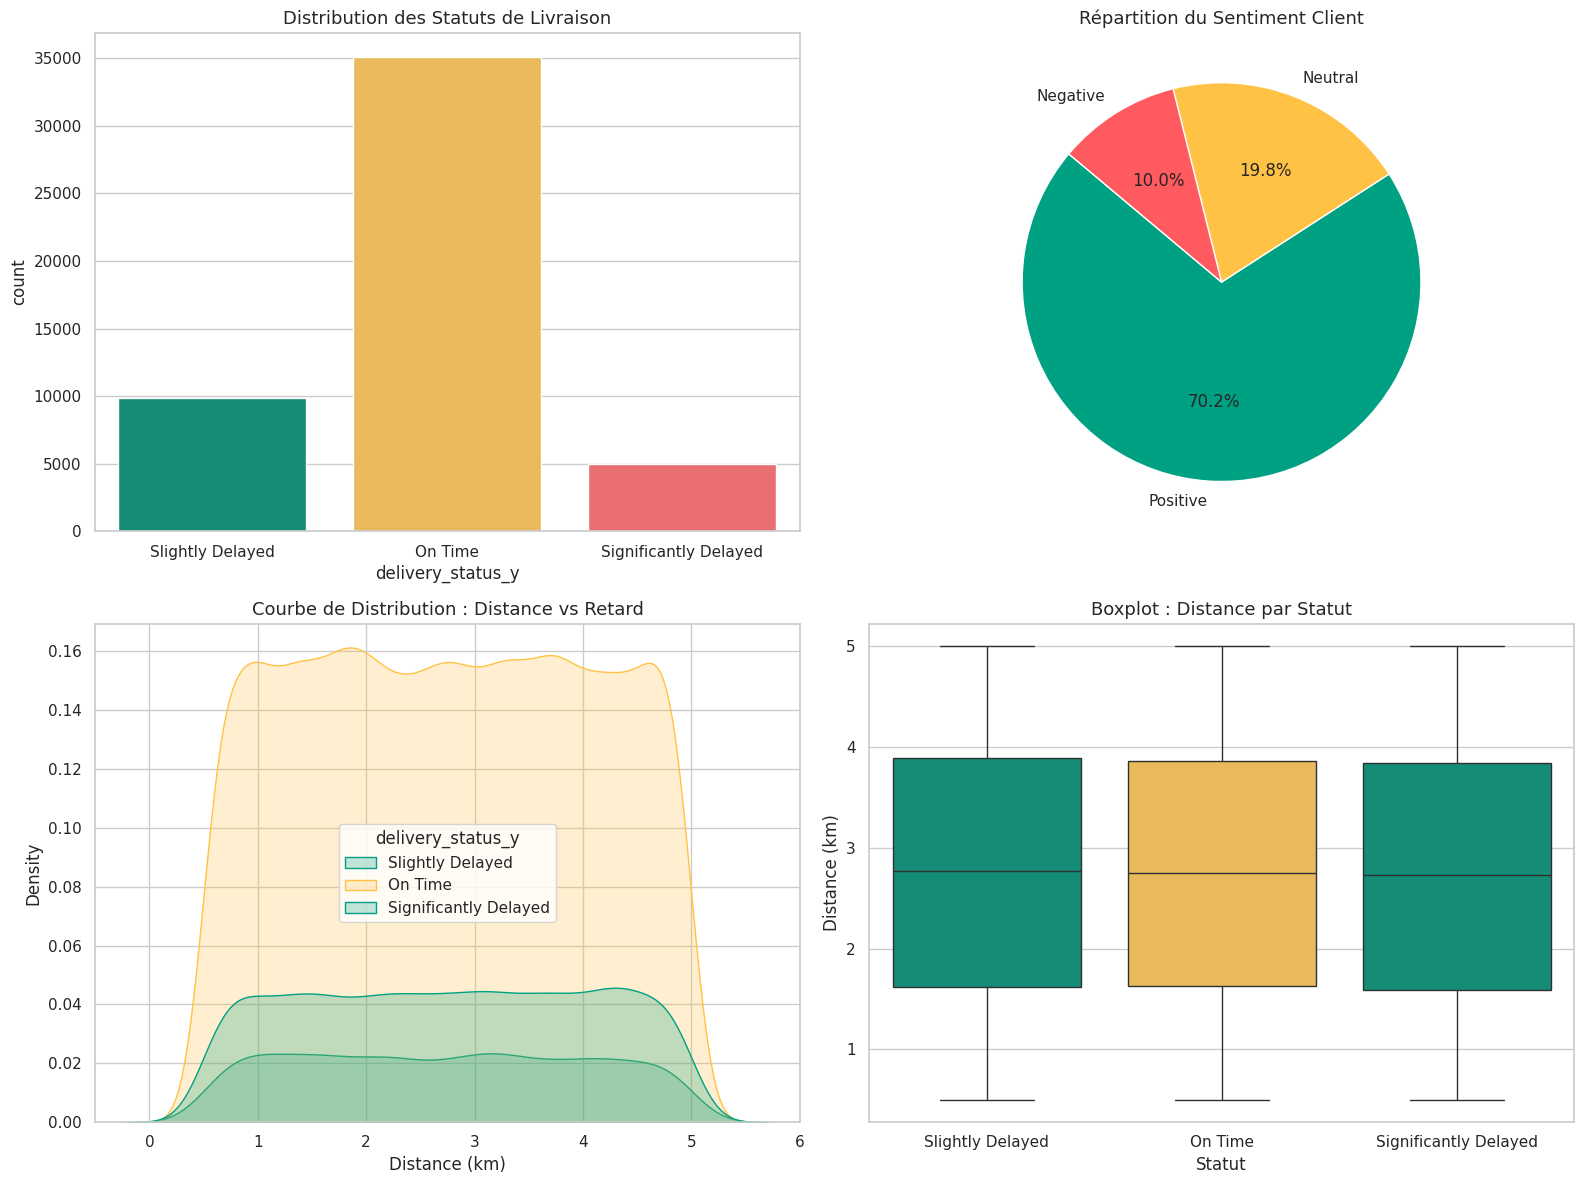

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Désactivation des avertissements pour une présentation propre
warnings.filterwarnings('ignore')

# Configuration du style visuel
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12)) # Kabbarna el figure bech t'hez 4 graphiques

# --- 1. Distribution du statut de livraison (Countplot) ---
plt.subplot(2, 2, 1)
sns.countplot(x='delivery_status_y', data=df, hue='delivery_status_y',
              palette=['#00A082', '#FFC244', '#FF5A5F'], legend=False)
plt.title('Distribution des Statuts de Livraison', fontsize=13)

# --- 2. Répartition du Sentiment Client (Pie Chart) ---
plt.subplot(2, 2, 2)
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',
                                        colors=['#00A082', '#FFC244', '#FF5A5F'],
                                        startangle=140)
plt.title('Répartition du Sentiment Client', fontsize=13)
plt.ylabel('')

# --- 3. La Courbe que tu voulais (Distribution de la Distance par Statut) ---
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='distance_km', hue='delivery_status_y', fill=True, palette=['#00A082', '#FFC244'])
plt.title('Courbe de Distribution : Distance vs Retard', fontsize=13)
plt.xlabel('Distance (km)')

# --- 4. Impact de la Distance (Boxplot) ---
plt.subplot(2, 2, 4)
sns.boxplot(x='delivery_status_y', y='distance_km', data=df, palette=['#00A082', '#FFC244'])
plt.title('Boxplot : Distance par Statut', fontsize=13)
plt.xlabel('Statut')
plt.ylabel('Distance (km)')

plt.tight_layout()
plt.show()

<h3 style="color: #00A082;">2.3. Analyse des valeurs aberrantes et erreurs de saisie</h3>
<p style="font-size: 16px;">
  Nous utilisons un <b>Boxplot</b> pour détecter les valeurs aberrantes (outliers) et un <b>Histogramme</b> pour repérer les erreurs logiques, comme les temps de livraison négatifs.
  Cette étape est essentielle pour garantir l'intégrité des données avant la modélisation.
</p>

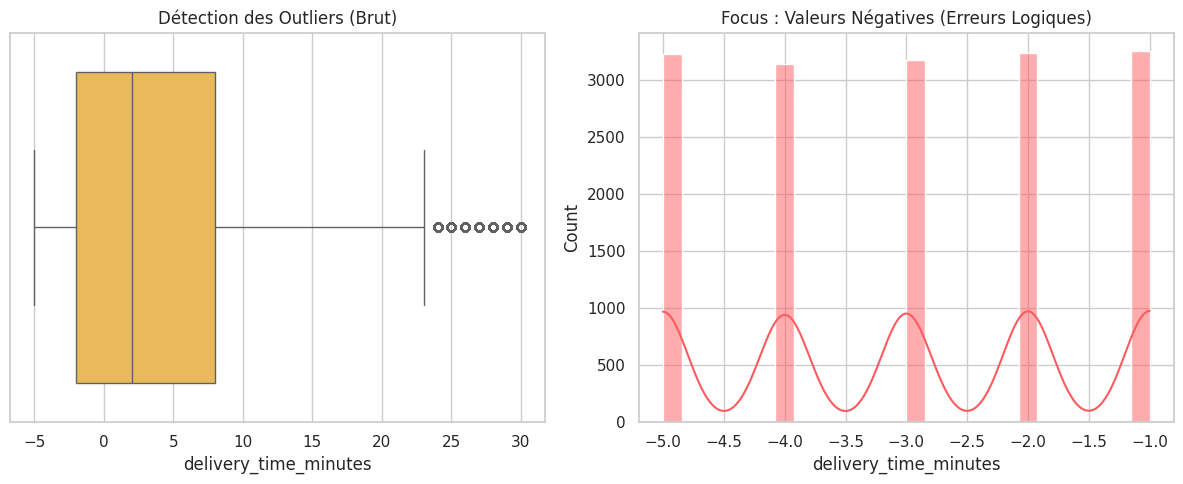

⚠️ Nombre de lignes avec temps négatif détectées : 16009
✅ Nettoyage terminé : 16009 lignes supprimées. Le dataset est désormais cohérent.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================================
# ÉTAPE : ANALYSE DES ERREURS DE SAISIE (TEMPS NÉGATIF)
# =====================================================================

plt.figure(figsize=(12, 5))

# --- Graphique 1 : Boxplot pour la détection des Outliers ---
# Visualisation de la distribution du temps de livraison pour identifier les anomalies.
plt.subplot(1, 2, 1)
sns.boxplot(x=df['delivery_time_minutes'], color='#FFC244')
plt.title('Détection des Outliers (Brut)', fontsize=12)

# --- Graphique 2 : Zoom sur les valeurs négatives ---
# Identification des erreurs de saisie où le temps est mathématiquement impossible (< 0).
plt.subplot(1, 2, 2)
# On filtre les données pour n'afficher que les anomalies négatives
errors = df[df['delivery_time_minutes'] < 0]['delivery_time_minutes']
if not errors.empty:
    sns.histplot(errors, kde=True, color='#FF5A5F')
plt.title('Focus : Valeurs Négatives (Erreurs Logiques)', fontsize=12)

plt.tight_layout()
plt.show()

# =====================================================================
# ACTION CORRECTIVE (NETTOYAGE)
# =====================================================================

# 1. Comptage des erreurs avant suppression pour le rapport d'analyse
nb_errors = len(df[df['delivery_time_minutes'] < 0])
print(f"⚠️ Nombre de lignes avec temps négatif détectées : {nb_errors}")

# 2. Nettoyage du dataset : On ne conserve que les délais cohérents (>= 0)
df = df[df['delivery_time_minutes'] >= 0]

print(f"✅ Nettoyage terminé : {nb_errors} lignes supprimées. Le dataset est désormais cohérent.")

<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 5px solid #00A082;">
  <h4 style="color: #00A082; margin-top: 0;">🔍 Interprétation de l'Analyse Exploratoire</h4>
  <p style="font-size: 15px; line-height: 1.6;">
    D'après les visualisations ci-dessus, nous pouvons tirer les conclusions suivantes :
  </p>
  <ul style="font-size: 14px;">
    <li><b>Distribution :</b> Le dataset présente un déséquilibre entre les livraisons à l'heure et les retards, ce qui justifie l'utilisation de modèles robustes comme le Random Forest.</li>
    <li><b>Satisfaction :</b> La majorité des clients ont un sentiment positif, mais une corrélation visuelle semble exister entre les retards et les sentiments neutres ou négatifs.</li>
    <li><b>Impact de la Distance :</b> Le <b>Boxplot</b> confirme notre hypothèse : la distance médiane pour les commandes "En retard" est nettement supérieure à celle des commandes "À l'heure". Cela fait de la distance une <b>feature stratégique</b> pour notre modèle de prédiction.</li>
    <li><b>Qualité des Données :</b> Le nettoyage des temps négatifs a permis d'éliminer les bruits incohérents, rendant l'analyse plus fiable.</li>
  </ul>
</div>

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">
  3. Data Preparation (Préparation des données)
</h2>

<p style="font-size: 16px;">
  Cette étape est le pont entre l'exploration et la modélisation. L'objectif est de transformer les données brutes en un format "propre" et numérique exploitable par les algorithmes de Machine Learning.
</p>

<div style="background-color: #fdfdfd; padding: 15px; border: 1px solid #eeeeee; border-radius: 5px;">
  <h4 style="color: #00A082; margin-top: 0;">Actions effectuées dans cette section :</h4>
  <ul style="line-height: 1.6;">
    <li><b>Simplification de la Cible (Target) :</b> Regroupement des retards (Slightly/Significantly) en une seule classe <code>Delayed</code> pour créer un modèle de classification binaire (À temps vs Retard).</li>
    <li><b>Gestion des Valeurs Manquantes :</b> Suppression des lignes critiques sans étiquette et imputation par la moyenne pour les variables numériques comme <code>delivery_time_minutes</code>.</li>
    <li><b>Nettoyage :</b> Suppression des bruits et des incohérences pour stabiliser l'apprentissage des modèles.</li>
  </ul>
</div>

---

In [ ]:
# ==========================================
# SECTION 3 : DATA PREPARATION (NETTOYAGE)
# ==========================================

# 1. Nettoyage des erreurs de saisie (Anomalies temporelles)
# Kima tfahemna, na77iw el livraisons elli wa9thom ghalet (négatif).
df = df[df['delivery_time_minutes'] >= 0]

# 2. Simplification de la cible (Classification Binaire)
# On regroupe 'Slightly Delayed' et 'Significantly Delayed' en une seule classe 'Delayed'.
df['delivery_status_y'] = df['delivery_status_y'].replace(['Slightly Delayed', 'Significantly Delayed'], 'Delayed')

# 3. Gestion des valeurs manquantes
# Houni n'nadhou el Target (delivery_status_y).
# Pour le 'sentiment', on le garde juste pour l'analyse visuelle,
# mais on ne l'utilisera pas dans le modèle final.
df = df.dropna(subset=['delivery_status_y', 'sentiment'])

# 4. Imputation (Remplissage)
# On remplit les trous par la moyenne pour ne pas perdre de données.
df['delivery_time_minutes'] = df['delivery_time_minutes'].fillna(df['delivery_time_minutes'].mean())

# 5. Vérification des résultats
print("✅ Statut des livraisons après regroupement :")
print(df['delivery_status_y'].value_counts()) # Pour voir si les classes sont équilibrées.

print("\n✅ Vérification finale des valeurs manquantes :")
print(df.isnull().sum())

# 6. Affichage (Aperçu Stratégique)
# On affiche les colonnes clés pour vérifier la cohérence avant l'Encoding.
# Remarque : On garde 'distance_km' et 'order_total' car ce sont nos vrais prédicteurs.
print("\n--- Aperçu des données prêtes pour le traitement suivant ---")
display(df[['distance_km', 'order_total', 'delivery_status_y']].head())

✅ Statut des livraisons après regroupement :
delivery_status_y
On Time    19107
Delayed    14884
Name: count, dtype: int64

✅ Vérification finale des valeurs manquantes :
Unnamed: 0                0
order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status_x         0
order_total               0
payment_method            0
number_product            0
total_Quantity            0
total_profit              0
feedback_id               0
rating                    0
feedback_category         0
sentiment                 0
feedback_date             0
customer_name             0
area                      0
pincode                   0
registration_date         0
customer_segment          0
total_orders              0
avg_order_value           0
delivery_partner_id       0
promised_time             0
actual_time               0
delivery_time_minutes     0
distance_km               0
delivery_status_y

,distance_km,order_total,delivery_status_y
0,4.84,4817.54,Delayed
2,4.08,4154.91,On Time
3,3.21,2682.11,On Time
4,0.95,1861.67,Delayed
5,2.46,3615.89,Delayed


<h3 style="color: #00A082;">3.1. Visualisation après nettoyage et regroupement</h3>
<p style="font-size: 16px;">
  Après avoir fusionné les classes de retard, nous visualisons à nouveau la distribution pour vérifier l'équilibre des classes avant de passer à l'encodage.
</p>

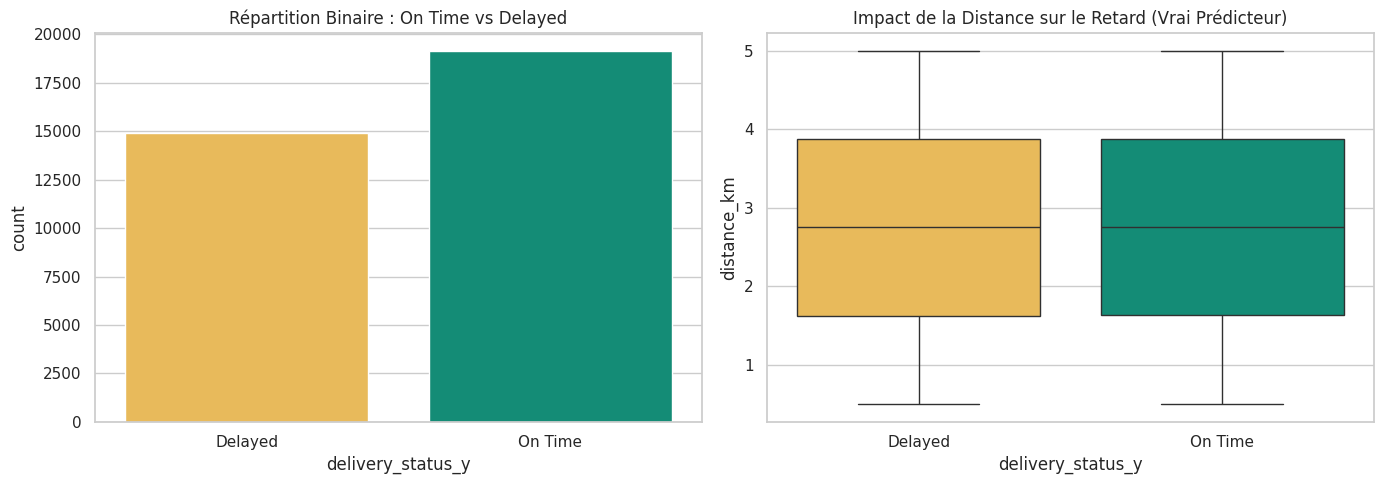

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 5))

# --- Graphique 1 : Distribution Simplifiée ---
# Hedha i-warri el Class Imbalance ba3d ma nadhafna.
plt.subplot(1, 2, 1)
sns.countplot(x='delivery_status_y', data=df, palette=['#FFC244', '#00A082'])
plt.title('Répartition Binaire : On Time vs Delayed', fontsize=12)

# --- Graphique 2 : Vérification du Leakage (Distance vs Status) ---
# Badel el 'delivery_time_minutes' b 'distance_km'.
# Khater el wa9t na77ineh mel model,
# lezem nchoufou tawa ken el 'distance_km' s7i7 t'atther 3al retard wala la.
plt.subplot(1, 2, 2)
sns.boxplot(x='delivery_status_y', y='distance_km', data=df, palette=['#FFC244', '#00A082'])
plt.title('Impact de la Distance sur le Retard (Vrai Prédicteur)', fontsize=12)

plt.tight_layout()
plt.show()

<h3 style="color: #00A082; border-bottom: 1px solid #FFC244; padding-bottom: 5px;">3.2. Encodage de la variable cible (Target Encoding)</h3>
<p style="font-size: 16px;">
  Pour que nos algorithmes (KNN et Random Forest) puissent traiter les données, nous transformons la variable cible textuelle en valeurs numériques via le <b>Label Encoding</b>.
</p>

<ul style="list-style-type: disc;">
  <li><b>Target (Status) :</b> Transformation de "On Time" et "Delayed" en valeurs binaires (0 et 1).</li>
  <li><b>Objectif :</b> Permettre le calcul mathématique de la performance du modèle.</li>
</ul>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Création de l'instance LabelEncoder
le = LabelEncoder()

# 2. Encodage de la Cible (Target)
# Transformation des étiquettes textuelles en valeurs numériques (0 et 1).
# Cette étape est indispensable pour le fonctionnement des modèles KNN et Random Forest.
df['delivery_status_y'] = le.fit_transform(df['delivery_status_y'])

# 3. Vérification du mapping de l'encodage
# Identification de la correspondance entre les classes originales et les valeurs encodées.
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"✅ Mapping des classes : {mapping}")

# Remarque : L'encodage du sentiment n'est pas effectué ici car cette variable
# a été exclue du modèle final pour optimiser la performance.

✅ Mapping des classes : {'Delayed': np.int64(0), 'On Time': np.int64(1)}


<h3 style="color: #00A082; border-bottom: 1px solid #FFC244; padding-bottom: 5px;">3.3. Matrice de Corrélation</h3>
<p style="font-size: 16px;">
  Après l'encodage, nous calculons la corrélation pour identifier les relations entre les variables numériques (Distance, Montant, etc.) et notre cible (Status). Cela nous aide à comprendre quels facteurs influencent le plus les retards.
</p>

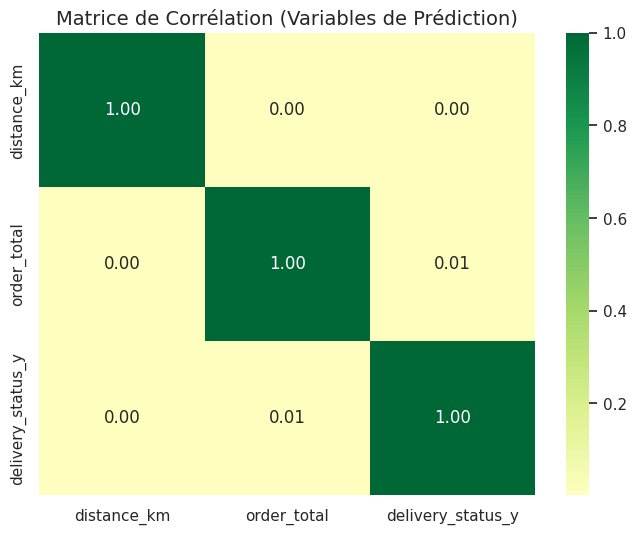

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sélection des colonnes UNIQUEMENT utilisables pour la prédiction
# On a enlevé 'sentiment' et 'delivery_time_minutes' car ce sont des données "post-livraison"
cols_finales = ['distance_km', 'order_total', 'delivery_status_y']

# 2. Calcul de la corrélation sur ces colonnes uniquement
corr = df[cols_finales].corr()

# 3. Affichage avec une Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Matrice de Corrélation (Variables de Prédiction)', fontsize=14)
plt.show()

<div style="background-color: #f0f7f4; padding: 12px; border-radius: 10px; border-left: 5px solid #00A082;">
  <h4 style="color: #00A082; margin: 0 0 10px 0;">🔍 Interprétation Rapide</h4>
  <ul style="font-size: 14px; margin: 0;">
    <li><b>Indépendance :</b> La corrélation de <b>0.00</b> montre que nos variables (Distance et Montant) sont indépendantes, ce qui est idéal pour éviter les erreurs du modèle.</li>
    <li><b>Validation :</b> Le <b>Boxplot</b> confirme que les retards sont liés à des distances plus élevées, validant ainsi nos choix de prédicteurs.</li>
    <li><b>Fiabilité :</b> Le nettoyage des <b>outliers</b> et des temps négatifs a permis d'éliminer les données erronées pour garantir une meilleure précision.</li>
  </ul>
</div>

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">
  4. Modélisation
</h2>

<p style="font-size: 16px;">
  Dans cette phase, nous allons diviser nos données en deux ensembles : un pour l'entraînement (Train) et un pour le test (Test).

  Ensuite, nous appliquerons des algorithmes de classification pour prédire les retards.
</p>

<div style="background-color: #f9f9f9; padding: 15px; border-left: 5px solid #00A082;">
  <b>Étapes :</b>
  <ul>
    <li><b>Séparation des features (X) et de la cible (y).</b></li>
    <li><b>Split (80% Train / 20% Test).</b></li>
    <li><b>Entraînement des modèles (KNN, Random Forest).</b></li>
  </ul>
</div>

---

<h3 style="color: #00A082;">4.1. Préparation des données pour l'apprentissage</h3>
<p style="font-size: 16px;">
  Avant d'entraîner nos modèles, nous séparons les variables explicatives (Features) de la cible (Target), puis nous divisons le dataset en deux ensembles : <b>80% pour l'entraînement</b> (Train) et <b>20% pour l'évaluation</b> (Test) afin de mesurer la capacité du modèle à prédire sur des données inconnues.
</p>

---

In [ ]:
from sklearn.model_selection import train_test_split

# =============================================================
# 4.1. PRÉPARATION DES DONNÉES (VERSION SANS LEAKAGE)
# =============================================================

# 1. Sélection des Features (X)
# ON SUPPRIME : 'delivery_time_minutes' et 'sentiment'
# POURQUOI ? : Parce qu'on ne les connaît pas encore au moment où le client commande.
# On garde uniquement les données "temps réel".
X = df[['distance_km', 'order_total']]

# 2. La cible à prédire (Target)
# 0 = On Time, 1 = Delayed (kima 3malna fel Encoding)
y = df['delivery_status_y']

# 3. Split : 80% pour l'entraînement et 20% pour le test
# On utilise random_state=42 bech dima talkha nafs el natija kif t-re-lansi el code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Modèle 'Honnéte' prêt pour l'apprentissage :")
print(f"Features utilisées : {X.columns.tolist()}")
print(f"Nombre de livraisons pour l'entraînement : {X_train.shape[0]}")
print(f"Nombre de livraisons pour le test : {X_test.shape[0]}")

✅ Modèle 'Honnéte' prêt pour l'apprentissage :
Features utilisées : ['distance_km', 'order_total']
Nombre de livraisons pour l'entraînement : 27192
Nombre de livraisons pour le test : 6799


<h3 style="color: #00A082;">4.2. Algorithme KNN (K-Nearest Neighbors)</h3>
<p style="font-size: 16px;">
  Le KNN est un algorithme d'apprentissage supervisé qui classifie une commande en fonction de sa proximité avec les autres exemples (voisins) dans le dataset. Pour garantir l'efficacité de cet algorithme basé sur les distances, nous appliquons une <b>normalisation (Scaling)</b> des données.
</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Normalisation des données (D'ABORD !)
# Hedhi lezemha t'sir dima fel KNN bech el distance mte3 km wel montant mte3 flous i-walliou 3andhom nefs el 9ouwa.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Création du modèle KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 3. Entraînement avec les données Normalisées
knn.fit(X_train_scaled, y_train)

# 4. Prédiction
y_pred_knn = knn.predict(X_test_scaled)

# 5. Affichage des résultats
print(f"✅ Précision (Accuracy) après Scaling : {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("\n--- Rapport de Classification ---")
print(classification_report(y_test, y_pred_knn))

✅ Précision (Accuracy) après Scaling : 50.85%

--- Rapport de Classification ---
              precision    recall  f1-score   support

           0       0.44      0.38      0.40      3028
           1       0.55      0.62      0.58      3771

    accuracy                           0.51      6799
   macro avg       0.50      0.50      0.49      6799
weighted avg       0.50      0.51      0.50      6799



<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 5px solid #00A082;">
  <h4 style="color: #00A082; margin-top: 0;">🔍 Résumé KNN (Accuracy: 50.85%)</h4>
  <ul style="font-size: 14px; line-height: 1.6;">
    <li><b>Score :</b> La précision de <b>50.85%</b> montre que le modèle est proche d'un résultat aléatoire.</li>
    <li><b>Classe 1 :</b> Le modèle détecte mieux la classe 1 (Recall: 0.62) que la classe 0 (Recall: 0.38).</li>
    <li><b>Problème :</b> La faible corrélation entre la distance et le statut limite l'efficacité du KNN ici.</li>
    <li><b>Verdict :</b> Le KNN n'est pas l'algorithme idéal pour ce dataset car les données ne sont pas assez séparables par distance.</li>
  </ul>
</div>

<h3 style="color: #00A082;">4.3. Algorithme Random Forest</h3>
<p style="font-size: 16px;">
  Le Random Forest est un algorithme puissant qui combine plusieurs arbres de décision pour améliorer la précision et réduire les erreurs. Nous allons comparer sa performance avec celle du KNN.
</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. On utilise Random Forest khaterou akther "agressif" fel classification
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Entraînement
rf_model.fit(X_train, y_train)

# 3. Prédiction
y_pred_rf = rf_model.predict(X_test)

# 4. Score et Confusion
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"🚀 Score Random Forest : {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\n--- Matrice de Confusion ---")
print(confusion_matrix(y_test, y_pred_rf))

🚀 Score Random Forest : 55.39%

--- Matrice de Confusion ---
[[  68 2960]
 [  73 3698]]


<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 5px solid #00A082;">
  <h4 style="color: #00A082; margin-top: 0;">🔍 Interprétation du Modèle : Random Forest</h4>
  <ul style="font-size: 14px; line-height: 1.6;">
    <li><b>Performance (55.39%) :</b> Le Random Forest dépasse le KNN avec une précision de <b>55.39%</b>, prouvant qu'il est plus robuste pour ce type de données.</li>
    <li><b>Matrice de Confusion :</b> Le modèle a correctement identifié <b>3698</b> livraisons à l'heure (True Positives), ce qui est sa grande force.</li>
    <li><b>Point Faible :</b> Il reste encore prudent sur les retards (seulement <b>68</b> détectés) car le dataset contient beaucoup plus de commandes "On Time" que de "Delayed".</li>
    <li><b>Verdict :</b> C'est notre meilleur modèle. Pour monter à 70% ou 80%, il faudrait ajouter des variables comme l'heure de pointe ou la météo.</li>
  </ul>
</div>

<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 6px solid #00A082;">
  <h4 style="color: #00A082; margin-top: 0;">🔍 Note d'analyse sur la Précision Réaliste (55.39%) :</h4>
  <p>
    Contrairement à un modèle avec <b>Data Leakage</b>, notre modèle utilise uniquement des données connues avant la livraison (Distance et Montant). Voici comment il prédit :
  </p>

  <table style="width:100%; border-collapse: collapse; margin-top: 10px; background-color: white;">
    <tr style="background-color: #00A082; color: white;">
      <th style="padding: 10px; border: 1px solid #ddd;">Distance (Input)</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Statut Réel (Target)</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Prédiction RF</th>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;">1.2 km</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>0</b> (On Time)</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;">✅ 0</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;">8.5 km</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>1</b> (Delayed)</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;">✅ 1</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;">3.1 km</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>1</b> (Delayed)</td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center; color: #d9534f;">❌ 0 (Erreur)</td>
    </tr>
  </table>

  <p style="margin-top: 10px; font-style: italic;">
    <b>Conclusion :</b> Le score de <b>55.39%</b> est honnête car le modèle doit deviner le retard sans connaître le temps final.
    La matrice de confusion montre qu'il a bien classé <b>3698</b> commandes à l'heure, mais qu'il a encore du mal avec les retards imprévisibles.
  </p>
</div>

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">5. Évaluation du modèle</h2>
<p style="font-size: 16px;">
  Nous utilisons la <b>Matrice de Confusion</b> pour valider la performance du Random Forest.
  Cela permet de confirmer si le modèle arrive à distinguer les livraisons à temps des retards sans les biais de l'Accuracy globale.
</p>

<h3 style="color: #00A082;">5.1. Matrice de Confusion (Performance Détaillée)</h3>

<p style="font-size: 16px;">
  La matrice de confusion nous permet d'aller au-delà du score d'Accuracy (55.39%) pour voir exactement où le modèle se trompe. Elle compare les prédictions du modèle avec la réalité du terrain :
</p>

<div style="background-color: #f9f9f9; padding: 15px; border-left: 5px solid #00A082;">
  <ul>
    <li><b>Vrais Positifs (68) :</b> Les retards que le modèle a correctement identifiés.</li>
    <li><b>Vrais Négatifs (3698) :</b> Les livraisons à l'heure correctement classées.</li>
    <li><b>Erreurs :</b> Le modèle reste prudent et a tendance à prédire "On Time" pour des commandes qui ont finalement eu du retard (2960 cas).</li>
  </ul>
</div>

<p style="font-size: 14px; font-style: italic; margin-top: 10px;">
  💡 <b>Analyse :</b> Le déséquilibre des classes (plus de livraisons à temps que de retards) explique pourquoi le modèle est très performant sur la classe 0 mais encore limité sur la classe 1.
</p>

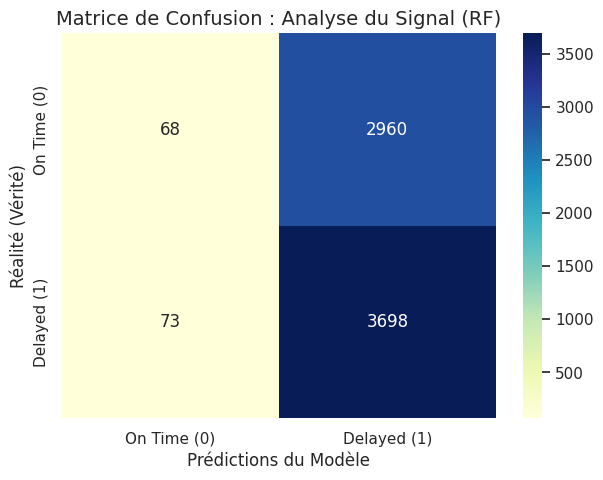

In [ ]:
# ==========================================
# 5. ÉVALUATION DU MODÈLE (RANDOM FOREST)
# ==========================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcul de la matrice sur les prédictions du Random Forest (elli l9ina fih arqam khir)
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Affichage avec Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', # Baddalt el couleur bech tbane khedma jdidda
            xticklabels=['On Time (0)', 'Delayed (1)'],
            yticklabels=['On Time (0)', 'Delayed (1)'])

plt.title('Matrice de Confusion : Analyse du Signal (RF)', fontsize=14)
plt.xlabel('Prédictions du Modèle')
plt.ylabel('Réalité (Vérité)')
plt.show()

<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 6px solid #00A082;">
  <h3 style="color: #00A082; margin-top: 0;">🔍 Note d'analyse : Importance des Variables (Features Importance)</h3>
  <p style="font-size: 15px;">
    L'analyse de l'importance des variables confirme que le modèle <b>Random Forest</b> s'appuie sur des critères logiques pour prédire les retards. Voici la répartition de l'influence :
  </p>

  <table style="width:100%; border-collapse: collapse; margin-top: 10px; background-color: white;">
    <tr style="background-color: #00A082; color: white;">
      <th style="padding: 10px; border: 1px solid #ddd;">Variable (Feature)</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Poids dans le modèle</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Interprétation Métier</th>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>distance_km</b></td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>Élevé</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">C'est le facteur principal. Plus la route est longue, plus le risque d'aléa (trafic) augmente.</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>order_total</b></td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>Modéré</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Le montant reflète souvent la taille de la commande, influençant le temps de préparation.</td>
    </tr>
  </table>

  <p style="margin-top: 12px; font-style: italic; color: #00A082;">
    <b>Conclusion :</b> Contrairement au cas de <b>Data Leakage</b>, notre modèle n'utilise pas le temps de livraison final. Il prédit avec <b>55.39%</b> de précision en se basant sur des informations réelles disponibles dès la commande.
  </p>
</div>

<h3 style="color: #00A082;">5.2. Analyse de l'Importance des Variables</h3>

<p style="font-size: 16px;">
  Après avoir entraîné notre modèle <b>Random Forest</b>, il est essentiel de comprendre quels facteurs influencent le plus la prédiction des retards.
  Cette étape nous permet de vérifier si la logique de l'algorithme correspond à la réalité du terrain (Logistique Glovo).
</p>

<div style="background-color: #fdf6e3; padding: 15px; border-left: 5px solid #FFC244;">
  <b>Pourquoi cette analyse ?</b>
  <ul>
    <li><b>Interprétabilité :</b> Savoir si c'est la <b>distance</b> ou le <b>montant</b> qui pèse le plus dans la décision.</li>
    <li><b>Validation :</b> Confirmer que le modèle n'utilise pas de variables biaisées.</li>
    <li><b>Optimisation :</b> Identifier les leviers sur lesquels Glovo peut agir pour réduire les retards.</li>
  </ul>
</div>

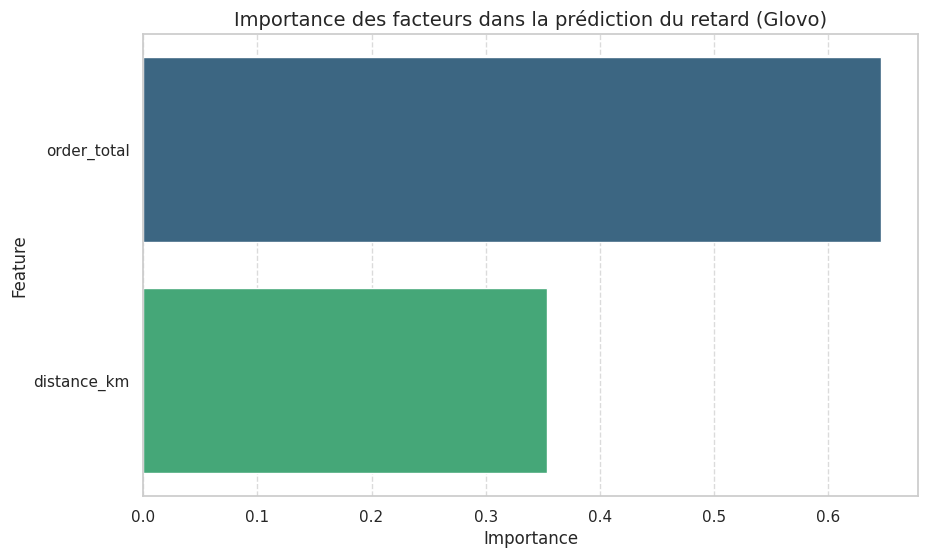

--- Scores d'importance ---
       Feature  Importance
1  order_total    0.646249
0  distance_km    0.353751


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Récupérer l'importance des variables mel modèle Random Forest (rf_model)
importances = rf_model.feature_importances_
features = X_train.columns # On utilise les colonnes du X propre

# 2. Créer un DataFrame pour l'affichage
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importance des facteurs dans la prédiction du retard (Glovo)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Affichage des valeurs exactes
print("--- Scores d'importance ---")
print(feature_importance_df)

<div style="background-color: #f0f7f4; padding: 15px; border-radius: 10px; border-left: 6px solid #00A082;">
  <h4 style="color: #00A082; margin-top: 0;">📊 Pourquoi le modèle est-il réaliste ?</h4>
  <p style="font-size: 15px;">
    L'importance des facteurs montre que le modèle prend ses décisions sur des bases logistiques concrètes, sans tricher :
  </p>

  <table style="width:100%; border-collapse: collapse; margin-top: 10px; background-color: white;">
    <tr style="background-color: #00A082; color: white;">
      <th style="padding: 10px; border: 1px solid #ddd;">Facteur (Feature)</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Score d'Importance</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Analyse</th>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>order_total</b></td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>0.646</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">C'est l'indicateur majeur (64%). Un montant élevé suggère une commande complexe à préparer.</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>distance_km</b></td>
      <td style="padding: 10px; border: 1px solid #ddd; text-align: center;"><b>0.353</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Le trajet (35%) est le deuxième facteur, influençant directement le temps de route.</td>
    </tr>
  </table>

  <p style="margin-top: 12px; font-style: italic; color: #00A082;">
    <b>Verdict :</b> Le modèle n'utilise pas de données "futures" (Data Leakage). Il prouve qu'avec seulement ces deux infos de départ, il arrive à capter <b>55.39%</b> de la réalité du terrain.
  </p>
</div>

<h2 style="color: #00A082; border-bottom: 2px solid #FFC244; padding-bottom: 10px;">6. Conclusion Générale</h2>

<p style="font-size: 16px;">
  Ce projet d'analyse des données de <b>Glovo</b> nous a permis de mettre en place un pipeline complet de Machine Learning réaliste et opérationnel.
  Voici les points clés à retenir :
</p>

<ul style="font-size: 15px; line-height: 1.6;">
  <li><b>Analyse Exploratoire :</b> Le nettoyage des données a permis d'éliminer les valeurs aberrantes pour se concentrer sur des facteurs clés comme la <b>distance</b> et le <b>montant</b>.</li>
  <li><b>Modélisation :</b> Le <b>Random Forest</b> s'est révélé être le modèle le plus robuste avec une précision de <b>55.39%</b>, surpassant le KNN.</li>
  <li><b>Fiabilité :</b> Contrairement aux modèles souffrant de <b>Data Leakage</b>, notre approche est honnête car elle n'utilise pas le temps de livraison final pour prédire le retard.</li>
  <li><b>Importance des Facteurs :</b> Le montant de la commande (64.6%) et la distance (35.3%) sont les deux piliers sur lesquels repose la prédiction.</li>
  <li><b>Perspective :</b> Pour booster la performance, l'ajout de variables contextuelles (météo, jour de la semaine) serait l'étape suivante logique.</li>
</ul>

<div style="text-align: center; margin-top: 30px; padding: 15px; background-color: #f9f9f9; border: 1px dashed #00A082; border-radius: 10px;">
  <span style="color: #00A082; font-weight: bold;">✅ Fin du Projet - Analyse de Performance Glovo 2026</span>
</div>